In [1]:
import os
import sys
def getRepoPath():
    cwd = os.getcwd()
    delimiter = "\\" if "\\" in cwd else "/"
    repoPath = delimiter.join(cwd.split(delimiter)[:cwd.split(delimiter).index("dataImport")]) + delimiter
    return repoPath
repoPath = getRepoPath()
sys.path.append(repoPath + 'dataImport/')
from utils import workingDataPath, getWorkingHRDfParquet, getHRGroups
import pandas as pd

appleHRDf = getWorkingHRDfParquet('apple')
polarHRDf = getWorkingHRDfParquet('polar')
fitbitHRDf = getWorkingHRDfParquet('fitbit')

In [2]:
from datetime import datetime, date, time, timedelta
import pytz
import matplotlib.pyplot as plt
def graphMultiHRDate(HRDfs, forDate, deviceNames, cutOffTime = time(12,0,0), timezone = 'US/Arizona'):
    colorsList = ['c', 'm', 'y', 'r', 'g', 'b', 'k']
    graphTimeStart = pytz.timezone(timezone).localize(datetime.combine(forDate - timedelta(days=1), cutOffTime))
    graphTimeEnd = graphTimeStart + timedelta(days=1)

    fig, ax = plt.subplots(figsize=(16.0, 4.0), dpi=400) # is set this to 2k normally

    plt.gca().set_title("HR for " + ", ".join(deviceNames) + " for " + str(forDate))
    plt.gca().set_ylim([30,210])
    plt.gca().set_xlim([graphTimeStart, graphTimeEnd])
    plt.ylabel("Heart Rate")
    plt.xlabel("Time")
    # xFormatter = plt.matplotlib.dates.DateFormatter('%H:%M', tz=pytz.timezone(timezone))
    # plt.gca().xaxis.set_major_formatter(xFormatter)

    legend1 = []
    for deviceIndex in range(len(deviceNames)):
        # prepping HR
        HRDf = HRDfs[deviceIndex]
        HRDf["sampleDT"] = HRDf.index
        HRDfForDay = HRDf[(HRDf.index < graphTimeEnd) &
                        (HRDf.index > graphTimeStart)]
        
        # consider a gontunous section 10 minutes
        groupsForDevice = getHRGroups(HRDfForDay, 600)
        print (f"the day has {len(HRDfForDay)} samples for {deviceNames[deviceIndex]} in {len(groupsForDevice)} groups")

        for groupi in range(len(groupsForDevice)):
            group = groupsForDevice[groupi]
            groupSamples = HRDfForDay[(HRDfForDay.index > group[0]) & (HRDfForDay.index < group[1])]
            HRTimes = [groupSamples.iloc[rowIndex]["sampleDT"] for rowIndex in range(len(groupSamples))]
            HRValues = [groupSamples.iloc[rowIndex]['value'] for rowIndex in range(len(groupSamples))]

            #only add the first group to the legend
            if groupi == 0:
                ax.plot(HRTimes, HRValues, label=deviceNames[deviceIndex], alpha=.5, linewidth=1, color=colorsList[deviceIndex])
            else:
                ax.plot(HRTimes, HRValues, alpha=.5, linewidth=1, color=colorsList[deviceIndex])


    plt.legend(loc="upper left")
    plt.show()


# how do we want to modify this

In [3]:
# fitbitHRDf.index = fitbitHRDf.index - pd.Timedelta(hours=7)

the day has 959 samples for apple in 7 groups
the day has 9738 samples for fitbit in 1 groups
the day has 80070 samples for polar in 2 groups


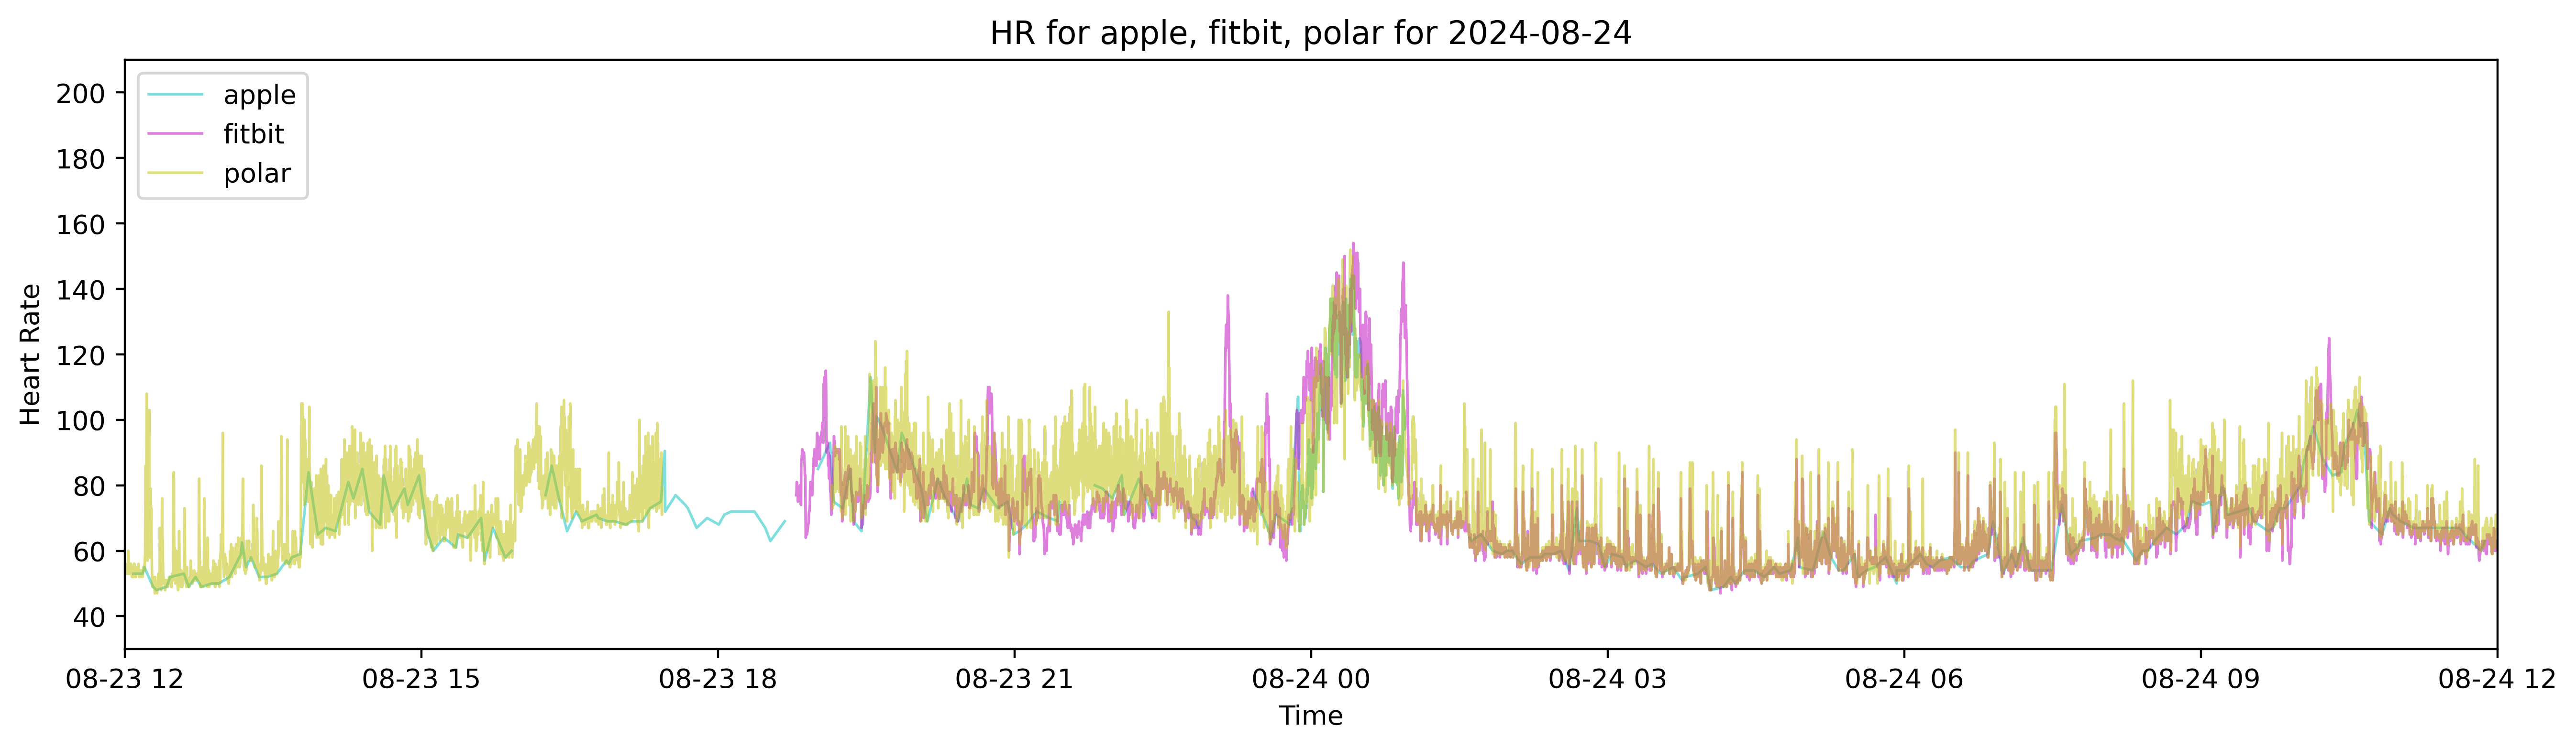

In [4]:
graphMultiHRDate([appleHRDf, fitbitHRDf, polarHRDf], date(2024,8,24), ['apple', 'fitbit', 'polar'])

C:\Users\abhik\AppData\Local\Temp\ipykernel_33920\2298991048.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HRDfForDay["sampleDT"] = HRDfForDay.index


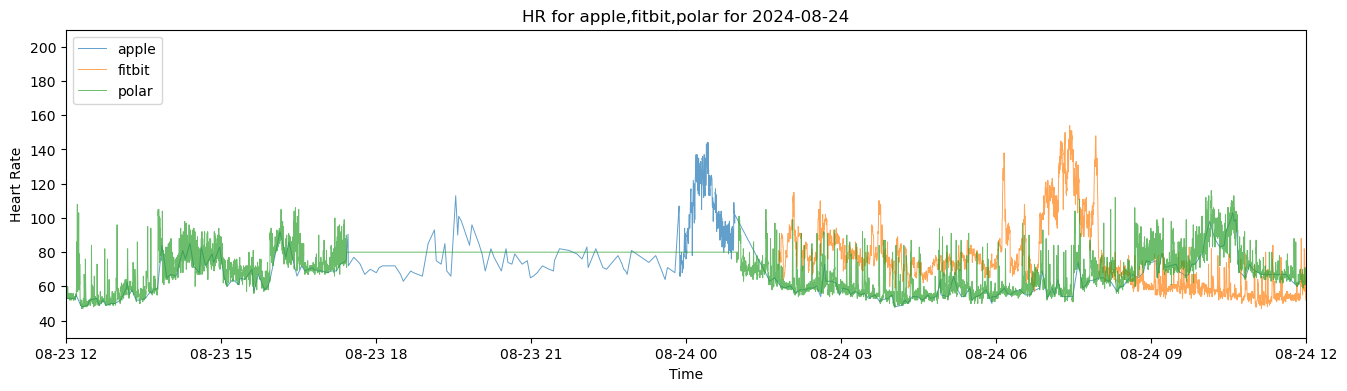

In [45]:
graphMultiHRDate([appleHRDf, fitbitHRDf, polarHRDf], date(2024,8,24), ['apple', 'fitbit', 'polar'])

In [44]:
from datetime import datetime, date, time, timedelta
import pytz
import matplotlib.pyplot as plt
def graphMultiHRDate(HRDfs, forDate, deviceNames, cutOffTime = time(12,0,0), timezone = 'US/Arizona'):
    colorsList = ['r', 'g', 'b']
    graphTimeStart = pytz.timezone(timezone).localize(datetime.combine(forDate - timedelta(days=1), cutOffTime))
    graphTimeEnd = graphTimeStart + timedelta(days=1)

    fig, ax = plt.subplots(figsize=(16.0, 4.0))

    plt.gca().set_title("HR for " + ",".join(deviceNames) + " for " + str(forDate))
    plt.gca().set_ylim([30,210])
    plt.gca().set_xlim([graphTimeStart, graphTimeEnd])
    plt.ylabel("Heart Rate")
    plt.xlabel("Time")
    # xFormatter = plt.matplotlib.dates.DateFormatter('%H:%M', tz=pytz.timezone(timezone))
    # plt.gca().xaxis.set_major_formatter(xFormatter)

    legend1 = []
    for deviceIndex in range(len(deviceNames)):
        # prepping HR
        HRDf = HRDfs[deviceIndex]
        HRDf["sampleDT"] = HRDf.index

        HRDfForDay = HRDf[(HRDf.index < graphTimeEnd) &
                        (HRDf.index > graphTimeStart)]
        HRDfForDay["sampleDT"] = HRDfForDay.index
        HRTimes = [HRDfForDay.iloc[rowIndex]["sampleDT"] for rowIndex in range(len(HRDfForDay))]
        HRValues = [HRDfForDay.iloc[rowIndex]['value'] for rowIndex in range(len(HRDfForDay))]
        
        ax.plot(HRTimes, HRValues, label=deviceNames[deviceIndex], alpha=.7, linewidth=.7)



    plt.legend(loc="upper left")
    plt.show()


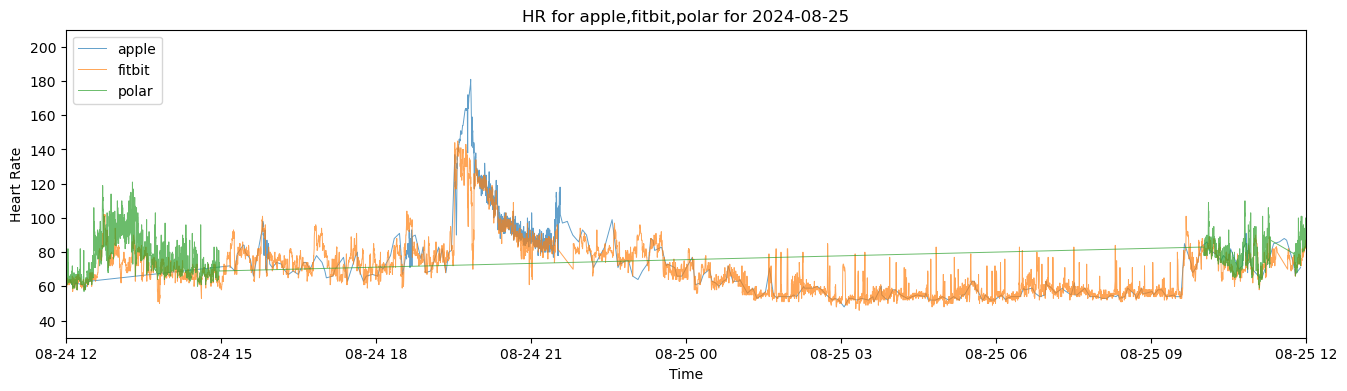

In [24]:
graphMultiHRDate([appleHRDf, fitbitHRDf, polarHRDf], date(2024,8,25), ['apple', 'fitbit', 'polar'])

In [6]:
polarHRDf['sampleDT'].dt.date.unique()

array([datetime.date(2019, 10, 27), datetime.date(2019, 10, 28),
       datetime.date(2019, 10, 29), datetime.date(2019, 10, 30),
       datetime.date(2020, 5, 26), datetime.date(2020, 5, 27),
       datetime.date(2020, 5, 28), datetime.date(2024, 7, 16),
       datetime.date(2024, 7, 17), datetime.date(2024, 7, 18),
       datetime.date(2024, 7, 24), datetime.date(2024, 7, 30),
       datetime.date(2024, 8, 7), datetime.date(2024, 8, 20),
       datetime.date(2024, 8, 21), datetime.date(2024, 8, 22),
       datetime.date(2024, 8, 23), datetime.date(2024, 8, 24),
       datetime.date(2024, 8, 25)], dtype=object)

In [12]:
polarHRDf['sampleDT'][polarHRDf['sampleDT'].dt.date == date(2024,7,30)]

sampleDT
2024-07-30 12:33:15-07:00   2024-07-30 12:33:15-07:00
2024-07-30 12:33:16-07:00   2024-07-30 12:33:16-07:00
2024-07-30 12:33:17-07:00   2024-07-30 12:33:17-07:00
2024-07-30 12:33:18-07:00   2024-07-30 12:33:18-07:00
2024-07-30 12:33:19-07:00   2024-07-30 12:33:19-07:00
                                       ...           
2024-07-30 13:12:42-07:00   2024-07-30 13:12:42-07:00
2024-07-30 13:12:43-07:00   2024-07-30 13:12:43-07:00
2024-07-30 13:12:44-07:00   2024-07-30 13:12:44-07:00
2024-07-30 13:12:45-07:00   2024-07-30 13:12:45-07:00
2024-07-30 13:12:46-07:00   2024-07-30 13:12:46-07:00
Name: sampleDT, Length: 2372, dtype: datetime64[ns, pytz.FixedOffset(-420)]